In [1]:
from EDF import Potential_single,Potential,EDF_Potential,EDF_Bag,syms_Lattimer,V_Lattimer_expr,get_eos_array_lepton,equation_transition_left,equation_transition_right,equation_transition,sol_to_all,eos_array_adiabatic
from unitconvert import unitMeVfm
from solver_equations import solve_equations
import numpy as np
import matplotlib.pyplot as plt
import os

#ensure output dir
path='./'
dir_name_data='data/'
try:
    os.stat(path+dir_name_data)
except:
    os.mkdir(path+dir_name_data)

In [2]:
#Define EDF for low density hadronic matter (ZLA)
Potential_Lattimer_sym=Potential_single([-96.64,58.85,1.40],syms_Lattimer,V_Lattimer_expr)
Potential_Lattimer_pnm=Potential_single([-26.06,7.34,2.45] ,syms_Lattimer,V_Lattimer_expr)
edf_hadronic=EDF_Potential(Potential(Potential_Lattimer_sym,Potential_Lattimer_pnm))

#Define EDF for high density quak matter (vMIT)
edf_bag=EDF_Bag([165**4*unitMeVfm,1,0.2])

In [3]:
#Calculate EOS in beta-equilibrium for hadronic and quark matter
ad_ratio=1e-4
nB_plot=np.linspace(0.05,2,196)
Ylep_array=[]
chempo_array=[]
eos_array=[]
eos_array_plus=[]
eos_array_minus=[]
for nB_i in nB_plot:
    Ylep_array.append([edf_hadronic.eosBeta_eq_from(nB_i),edf_bag.eosBeta_eq_from(nB_i)])
    eos_array.append([edf_hadronic.eos_array_from_n(Ylep_array[-1][0]*nB_i,(1-Ylep_array[-1][0])*nB_i),edf_bag.eos_array_from_n(Ylep_array[-1][1],nB_i)])
    eos_array_plus.append([edf_hadronic.eos_array_from_n(Ylep_array[-1][0]*nB_i*(1+ad_ratio),(1-Ylep_array[-1][0])*nB_i*(1+ad_ratio)),edf_bag.eos_array_from_n(Ylep_array[-1][1],nB_i*(1+ad_ratio))])
    eos_array_minus.append([edf_hadronic.eos_array_from_n(Ylep_array[-1][0]*nB_i*(1-ad_ratio),(1-Ylep_array[-1][0])*nB_i*(1-ad_ratio)),edf_bag.eos_array_from_n(Ylep_array[-1][1],nB_i*(1-ad_ratio))])
    chempo_array.append([edf_hadronic.eosChempo_from_n(Ylep_array[-1][0]*nB_i,(1-Ylep_array[-1][0])*nB_i),edf_bag.eosChempo_from_n(Ylep_array[-1][1],nB_i)])
Ylep_array=np.array(Ylep_array).transpose()
eos_array=np.array(eos_array).transpose((1,2,0))
eos_array_plus=np.array(eos_array_plus).transpose((1,2,0))
eos_array_minus=np.array(eos_array_minus).transpose((1,2,0))
chempo_array=np.array(chempo_array).transpose((1,2,0))

eos_array_emu=get_eos_array_lepton(eos_array[:,3]).transpose(2,1,0,3)
eos_array_lepton=eos_array_emu.sum(axis=1)
eos_array_emu_plus=get_eos_array_lepton(eos_array[:,3],ad_ratio=1+ad_ratio/3).transpose(2,1,0,3)
eos_array_lepton_plus=eos_array_emu_plus.sum(axis=1)
eos_array_emu_minus=get_eos_array_lepton(eos_array[:,3],ad_ratio=1-ad_ratio/3).transpose(2,1,0,3)
eos_array_lepton_minus=eos_array_emu_minus.sum(axis=1)

cs2ad_array=(eos_array_plus[:,2]+eos_array_lepton_plus[:,2]-eos_array_minus[:,2]-eos_array_lepton_minus[:,2])/(eos_array_plus[:,1]+eos_array_lepton_plus[:,1]-eos_array_minus[:,1]-eos_array_lepton_minus[:,1])

Text(0, 0.5, '$c_s^2/c^2$')

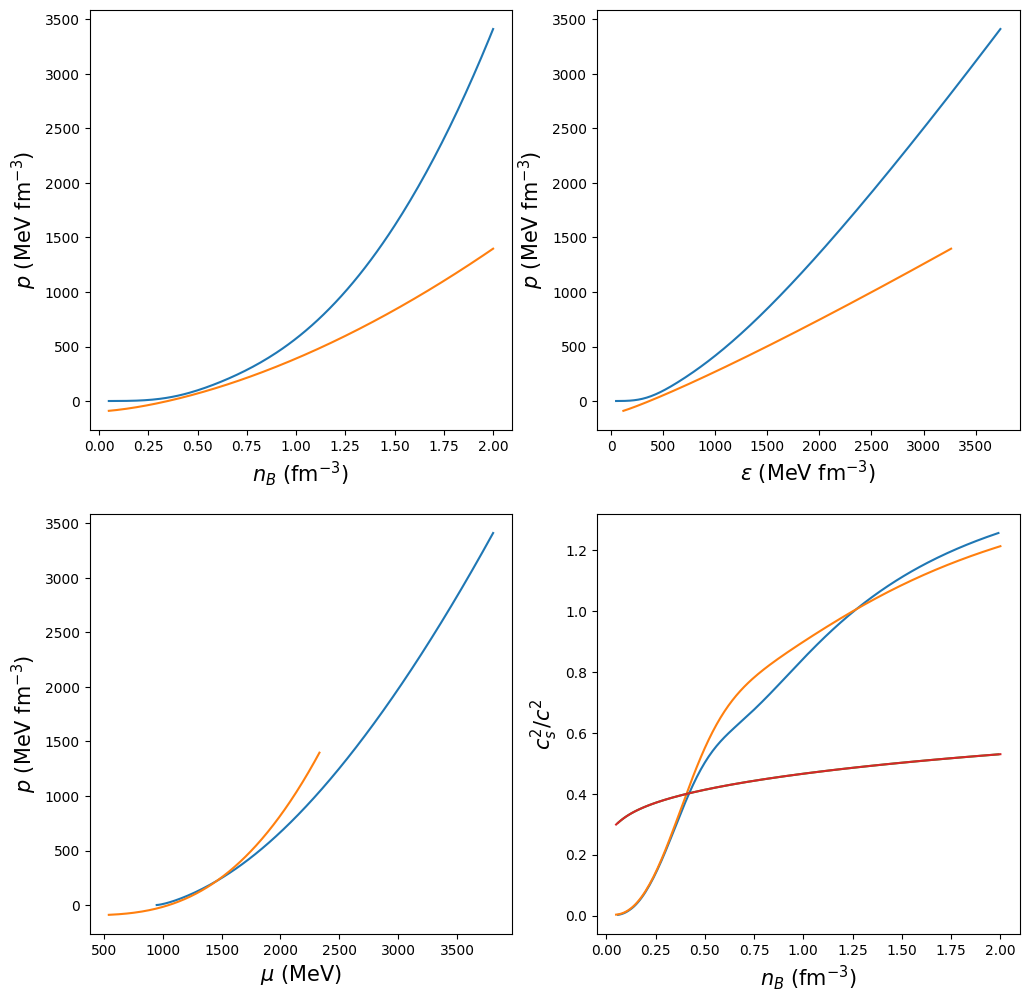

In [4]:
#Plot EOS in beta-equilibrium for hadronic and quark matter 
chempo_plot=np.linspace(300,800,101)
fig,axes_all=plt.subplots(2,2,figsize=(12,12),sharex=False,sharey=False)
for i,eos_array_i,eos_array_lepton_i,chempo_array_i,cs2ad_array_i in zip(range(2),eos_array,eos_array_lepton,chempo_array,cs2ad_array):
    axes_all[0,0].plot(eos_array_i[0],eos_array_i[2])
    axes_all[0,1].plot(eos_array_i[1],eos_array_i[2])
    axes_all[1,0].plot((eos_array_i[1]+eos_array_i[2]+eos_array_lepton_i[1]+eos_array_lepton_i[2])/eos_array_i[0],eos_array_i[2])
    axes_all[1,1].plot(eos_array_i[0][1:-1],(eos_array_i[2][2:]-eos_array_i[2][:-2])/(eos_array_i[1][2:]-eos_array_i[1][:-2]))
    axes_all[1,1].plot(eos_array_i[0],cs2ad_array_i)
axes_all[0,0].set_xlabel('$n_B$ (fm$^{-3}$)',fontsize=15)
axes_all[0,1].set_xlabel('$\\varepsilon$ (MeV fm$^{-3}$)',fontsize=15)
axes_all[1,0].set_xlabel('$\mu$ (MeV)',fontsize=15)
axes_all[1,1].set_xlabel('$n_B$ (fm$^{-3}$)',fontsize=15)
axes_all[0,0].set_ylabel('$p$ (MeV fm$^{-3}$)',fontsize=15)
axes_all[0,1].set_ylabel('$p$ (MeV fm$^{-3}$)',fontsize=15)
axes_all[1,0].set_ylabel('$p$ (MeV fm$^{-3}$)',fontsize=15)
axes_all[1,1].set_ylabel('$c_s^2/c^2$',fontsize=15)


In [5]:
#Save EOS in beta-equilibrium for hadronic and quark matter 
header =['n_lep/nB nB(fm-3) eps_N(MeVfm-3) p_N(MeVfm-3) chempo_lep(MeV) chempo_p(MeV) chempo_n(MeV)  n_e(fm-3) eps_e(MeVfm-3) p_e(MeVfm-3) n_mu(fm-3) eps_mu(MeVfm-3) p_mu(MeVfm-3) cs2ad']
header+=['n_lep/nB nB(fm-3) eps_Q(MeVfm-3) p_Q(MeVfm-3) chempo_lep(MeV) chempo_u(MeV) chempo_ds(MeV) n_e(fm-3) eps_e(MeVfm-3) p_e(MeVfm-3) n_mu(fm-3) eps_mu(MeVfm-3) p_mu(MeVfm-3) cs2ad']
name =['ZLA','vMIT']
for name_i,eos_data_i,header_i in zip(name,np.concatenate((Ylep_array[:,np.newaxis],eos_array,chempo_array,eos_array_emu.reshape((2,6,len(nB_plot))),cs2ad_array[:,np.newaxis]),axis=1),header):
    np.savetxt(path+dir_name_data+'%s.txt'%(name_i),eos_data_i.transpose(),fmt='%.6g',header=header_i)

In [6]:
#verify Maxwell transition
g=1
init=[0.5,0.8, -1]
#init=[1,1.2, -1]
sol_maxwell_low =solve_equations(equation_transition_left,(init,),g,vary_list=np.array([1]),tol=1e-12,equations_extra_args=[edf_hadronic,edf_bag])
print(sol_maxwell_low[1][:2],edf_hadronic.eosBeta_eq_from(sol_maxwell_low[1][0]),(3*np.tanh(sol_maxwell_low[1][2])+1)/2)

sol_maxwell_high=solve_equations(equation_transition_right,(init,),g,vary_list=np.array([1]),tol=1e-12,equations_extra_args=[edf_hadronic,edf_bag])
print(sol_maxwell_high[1][:2],(np.tanh(sol_maxwell_high[1][2])+1)/2,edf_bag.eosBeta_eq_from(sol_maxwell_high[1][1]))

[0.7504823206124138, 0.8799532191345134] 0.28535732093728405 1.2009316973482509e-05
[0.7504823206124371, 0.8799532191345594] 0.28535732093729094 1.2009316973315975e-05


In [7]:
#Compute baryon density range where mixed phase span.
init_low =sol_maxwell_low[1]
init_high=sol_maxwell_high[1]
sol_low=[init_low]
sol_high=[init_high]
g_array=np.linspace(1,0,101)
for g in g_array[1:]:
    sol1=solve_equations(equation_transition_left,(init_low,),g,vary_list=np.array([1]),tol=1e-12,equations_extra_args=[edf_hadronic,edf_bag])
    sol2=solve_equations(equation_transition_right,(init_high,),g,vary_list=np.array([1]),tol=1e-12,equations_extra_args=[edf_hadronic,edf_bag])
    
    if(sol1[0] and sol2[0]):
        init_low=2*np.array(sol1[1])-np.array(sol_low[-1])
        init_high=2*np.array(sol2[1])-np.array(sol_high[-1])
        sol_low.append(sol1[1])
        sol_high.append(sol2[1])
    else:
        print(g)
        break
        
g_array=np.array(g_array)[::5]
sol_low=np.array(sol_low)[::5]
sol_high=np.array(sol_high)[::5]

print('lower bound:\n',sol_low)
print('upper bound:\n',sol_high)

lower bound:
 [[ 0.75048232  0.87995322 -0.34656458]
 [ 0.7461396   0.87291869 -0.3465736 ]
 [ 0.74185638  0.86601067 -0.34659573]
 [ 0.73762569  0.85921737 -0.34675549]
 [ 0.7334212   0.85249694 -0.34726771]
 [ 0.72918114  0.84575322 -0.34848879]
 [ 0.72478159  0.83879584 -0.35098949]
 [ 0.71991443  0.83116951 -0.35735114]
 [ 0.71385638  0.82179976 -0.36979733]
 [ 0.70562977  0.80928769 -0.38997537]
 [ 0.69403483  0.79202189 -0.41955462]
 [ 0.67782399  0.76849556 -0.45961247]
 [ 0.65601576  0.73779146 -0.51033592]
 [ 0.62823719  0.70002507 -0.57097302]
 [ 0.59490157  0.65647871 -0.64005341]
 [ 0.55706944  0.60931438 -0.71582847]
 [ 0.51606813  0.56107572 -0.7968071 ]
 [ 0.47314534  0.5143148  -0.88225238]
 [ 0.42934489  0.47141029 -0.97253317]
 [ 0.3855208   0.43434762 -1.06913016]
 [ 0.34229826  0.4043611  -1.17401955]]
upper bound:
 [[ 0.75048232  0.87995322 -0.45902026]
 [ 0.77221652  0.90352949 -0.41445613]
 [ 0.7957054   0.92990427 -0.37171503]
 [ 0.820753    0.95907345 -0.331275

In [8]:
#Compute equilibrium composition for mixed phase.

N=100
sol_all=[]
N_success=N
for g,init_low,init_high in zip(g_array,sol_low,sol_high):
    
    N_plus=0
    sol_all.append([])
    for N_plus in range(20):
        nB_array=np.linspace(init_low[0],init_high[0],N+N_plus)
        init=[np.arctanh(2*edf_hadronic.eosBeta_eq_from(init_low[0])-1),init_low[1],init_low[2]]

        #nB_array=np.linspace(init_high[0],init_low[0],N)
        #init=[init_high[2],init_high[1],np.arctanh((2*edf_bag.eosBeta_eq_from(init_high[0])-1)/3)]

        print(g,N_plus)
        for nB_i in nB_array:
            sol=solve_equations(equation_transition,(init,),nB_i,vary_list=np.array([1,0.999,1.001]),tol=1e-12,equations_extra_args=[g,edf_hadronic,edf_bag])
            if(sol[0]):
                if(np.abs(equation_transition(sol[1],nB_i,[g,edf_hadronic,edf_bag])).max()>1e-6):
                    #print(nB_i*(np.tanh(sol[1][0])+1)/2,equation_transition(sol[1],nB_i,[g,edf_hadronicskyrme_sly4,edf_bag]))
                    pass
                else:
                    init=sol[1]
                    sol_all[-1].append([nB_i]+sol[1])
            else:
                print('error')
                print(nB_i)

        N_success=len(sol_all[-1])
        if(N_success<N):
            sol_all[-1]=[]
        else:
            sol_all[-1]=sol_all[-1][:N]
            break
sol_all=np.array(sol_all)
print('Successful if ',sol_all.shape,' is the same as (',len(g_array),',',N,',4)')

1.0 0
0.95 0
0.95 1
0.95 2
0.95 3
0.95 4
0.95 5
0.95 6
0.95 7
0.9 0
0.9 1
0.9 2
0.9 3
0.85 0
0.85 1
0.85 2
0.8 0
0.8 1
0.75 0
0.75 1
0.7 0
0.7 1
0.6499999999999999 0
0.6499999999999999 1
0.6 0
0.6 1
0.55 0
0.5 0
0.44999999999999996 0
0.4 0
0.4 1
0.35 0
0.29999999999999993 0
0.25 0
0.19999999999999996 0
0.15000000000000002 0
0.09999999999999998 0
0.04999999999999993 0
0.0 0
Successful if  (21, 100, 4)  is the same as ( 21 , 100 ,4)


In [9]:
#check residual of equations
result=[]
for g,sol_all_i in zip(g_array,sol_all):
    for sol,nB in zip(sol_all_i[:,1:],sol_all_i[:,0]):
        result.append(equation_transition(sol,nB,[g,edf_hadronic,edf_bag]))
result=np.array(result).reshape(sol_all.shape[:2]+(-1,))

print('Check for potential large residual:')
np.where(np.abs(result)>1e-6)

Check for potential large residual:


(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [10]:
#Compute EOS and chemical composition for mixed phase.
header ='g f(hadronic matter fraction) '
header+='nB(fm-3) density(MeVfm-3) pressure(MeVfm-3) '
header+='chempo_p(MeV) chempo_n(MeV) chempo_u(MeV) chempo_d(MeV) chempo_lep_N(MeV) chempo_lep_Q(MeV) chempo_lep_G(MeV) '
header+='p(fm-3) n(fm-3) u(fm-3) d+s(fm-3) eN(fm-3) muN(fm-3) eQ(fm-3) muQ(fm-3) eG(fm-3) muG(fm-3) '
result_all_list=[]
adiabatic_ratio=1e-3
for g,sol_all_i in zip(g_array,sol_all):
    result_all_list.append(sol_to_all(g,sol_all_i[:,0],sol_all_i[:,1:],edf_hadronic,edf_bag))
    #np.savetxt(path+dir_name_data+'MIX_a20_B165_g%d.txt'%(int(10.01*g)),result_all_list[-1][:22].transpose(),fmt='%.6g',header=header)
    np.savetxt(path+dir_name_data+'MIX_a20_B165_g%d.txt'%(int(100.01*g)),result_all_list[-1][:22].transpose(),fmt='%.6g',header=header)
result_all_list=np.array(result_all_list)

(0.0, 1300.0)

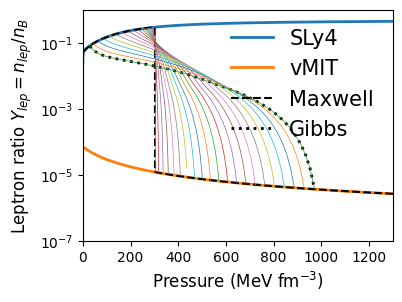

In [11]:
#check lepton fraction for hadronic matter, quark matter and mixed matter
plt.figure(figsize=(4,3))
plt.plot(eos_array[0,2],Ylep_array[0],label='SLy4',lw=2)
plt.plot(eos_array[1,2],Ylep_array[1],label='vMIT',lw=2)
plt.plot(result_all_list[0,4],((result_all_list[0,16]+result_all_list[0,17])*result_all_list[0,0]*result_all_list[0,1]+(result_all_list[0,18]+result_all_list[0,19])*result_all_list[0,0]*(1-result_all_list[0,1])+(result_all_list[0,20]+result_all_list[0,21])*(1-result_all_list[0,0]))/result_all_list[0,2],'k--',label='Maxwell')
plt.plot(eos_array[0,2][eos_array[0,2]<result_all_list[0,4,0]],Ylep_array[0][eos_array[0,2]<result_all_list[0,4,0]],'k--')
plt.plot(eos_array[1,2][eos_array[1,2]>result_all_list[0,4,0]],Ylep_array[1][eos_array[1,2]>result_all_list[0,4,0]],'k--')
plt.plot(result_all_list[-1,4],((result_all_list[-1,16]+result_all_list[-1,17])*result_all_list[-1,0]*result_all_list[-1,1]+(result_all_list[-1,18]+result_all_list[-1,19])*result_all_list[-1,0]*(1-result_all_list[-1,1])+(result_all_list[-1,20]+result_all_list[-1,21])*(1-result_all_list[-1,0]))/result_all_list[-1,2],'k:',label='Gibbs',lw=2)
for result_all_list_i,g in zip(result_all_list,g_array):
    plt.plot(result_all_list_i[4],((result_all_list_i[16]+result_all_list_i[17])*result_all_list_i[0]*result_all_list_i[1]+(result_all_list_i[18]+result_all_list_i[19])*result_all_list_i[0]*(1-result_all_list_i[1])+(result_all_list_i[20]+result_all_list_i[21])*(1-result_all_list_i[0]))/result_all_list_i[2],lw=0.5)
plt.legend(frameon=False,fontsize=15)
plt.xlabel('Pressure (MeV fm$^{-3}$)',fontsize=12)
plt.ylabel('Leptron ratio $Y_{lep}=n_{lep}/n_B$',fontsize=12)
plt.yscale('log')
plt.ylim(1e-7,1)
plt.xlim(0,1300)
#plt.savefig(path+fig_name+'EOS_trans_Ylep.pdf',bbox_inches = 'tight',format='pdf')

Text(0, 0.5, '$E$ (MeV)')

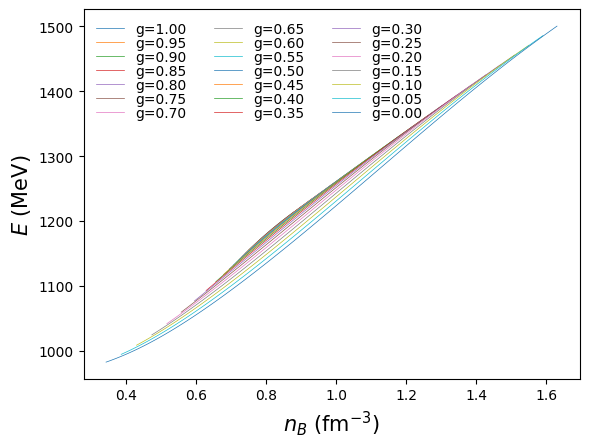

In [12]:
# Demostrate total energy not minimized for Maxwell. Gibbs has lowest energy.
for result_all_list_i,g in zip(result_all_list,g_array):
    plt.plot(result_all_list_i[2],result_all_list_i[3]/result_all_list_i[2],lw=0.5,label='g=%.2f'%g)
plt.legend(frameon=False,fontsize=10,ncol=3,labelspacing=0)
plt.xlabel('$n_B$ (fm$^{-3}$)',fontsize=15)
plt.ylabel('$E$ (MeV)',fontsize=15)

In [13]:
#Compute adiabatic sound speed for mixed phase
ad_det=1e-5
eos_array_all_ad=[]
for result_all_list_i in result_all_list:
    eos_array_all_ad.append(eos_array_adiabatic(result_all_list_i[:22],edf_hadronic,edf_bag,ad_ratio=1+ad_det)-eos_array_adiabatic(result_all_list_i[:22],edf_hadronic,edf_bag,ad_ratio=1-ad_det))
eos_array_all_ad=np.array(eos_array_all_ad).transpose((0,2,1))

np.savetxt(path+dir_name_data+'MIX_a20_B165_cs2ad.txt',(eos_array_all_ad[:,2]/eos_array_all_ad[:,1]).transpose(),fmt='%.6g',header='g='+str(g_array))


Text(0, 0.5, '$c_{s,ad}^2$')

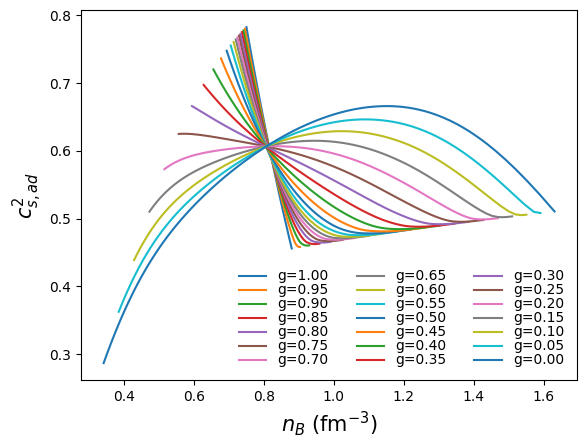

In [14]:
#Plot adiabatic sound speed for mixed phase
for result_all_list_i,eos_array_all_ad_i,g in zip(result_all_list,eos_array_all_ad,g_array):
    plt.plot(result_all_list_i[2],eos_array_all_ad_i[2]/eos_array_all_ad_i[1],label='g=%.2f'%g)
plt.legend(frameon=False,fontsize=10,ncol=3,labelspacing=0)
plt.xlabel('$n_B$ (fm$^{-3}$)',fontsize=15)
plt.ylabel('$c_{s,ad}^2$',fontsize=15)